In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import pickle as pc
from scipy import sparse
from sklearn import model_selection, preprocessing, ensemble
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

/home/rishabh/.local/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/rishabh/.local/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/rishabh/.local/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/rishabh/.local/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/rishabh/.local/lib/python2.7/site-packages/pandas/core/indexes/base.py:7: Runtime

/home/rishabh/.local/lib/python2.7/site-packages/scipy/cluster/vq.py:78: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _vq
/home/rishabh/.local/lib/python2.7/site-packages/scipy/cluster/hierarchy.py:178: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _hierarchy, _optimal_leaf_ordering
/home/rishabh/.local/lib/python2.7/site-packages/sklearn/linear_model/base.py:35: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ..utils.seq_dataset import ArrayDataset, CSRDataset
/home/rishabh/.local/lib/python2.7/site-packages/sklearn/linear_model/least_angle.py:23: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ..utils import arrayfuncs, as_float_array, check_X_y, deprecated
/home/rishabh/.local/lib/python2.7/site-packages/sklearn/linear_model/coordin

In [2]:
#loading 2014 data
sdf=pd.read_csv("data1.csv")

#removing unnecessary features
sdf = sdf.drop(['comments'], axis= 1)
sdf = sdf.drop(['state'], axis= 1)
sdf = sdf.drop(['Timestamp'], axis= 1)

#loading 2016 data
rdf=pd.read_csv("data2.csv")

#removing unnecessary features
rdf = rdf.drop(['state'], axis= 1)
rdf = rdf.drop(['Timestamp'], axis= 1)
rdf = rdf.drop(['role'], axis= 1)

#merging the data frames
frames = [sdf, rdf]
df=pd.concat(frames,sort=True)

#seed value and shuffling
np.random.seed(90)
df = df.sample(frac=1).reset_index(drop=True)

#having a look at the data
df.head()

,Age,Country,Gender,anonymity,benefits,care_options,coworkers,family_history,leave,mental_health_consequence,...,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,supervisor,tech_company,treatment,wellness_program,work_interfere
0,40,United States of America,male,Yes,Yes,NaN,Maybe,Yes,Somewhat difficult,No,...,No,No,Always,Yes,0,Maybe,1,1,Yes,Sometimes
1,37,United Kingdom,Male,Yes,Yes,Yes,Some of them,Yes,Somewhat difficult,Yes,...,Maybe,Yes,No,Yes,No,No,No,Yes,Yes,Rarely
2,22,United Kingdom,Male,I don't know,No,NaN,No,I don't know,I don't know,Yes,...,Maybe,Maybe,Never,No,0,No,1,0,No,Not applicable to me
3,49,United States of America,F,Yes,Yes,NaN,Maybe,Yes,Very easy,Maybe,...,No,Maybe,Sometimes,Yes,0,Yes,0,1,Yes,Sometimes
4,28,United States of America,Female,Yes,Not eligible for coverage / N/A,NaN,Maybe,Yes,Very easy,No,...,No,No,Sometimes,Yes,0,Yes,1,1,No,Often


In [3]:
#Data Preprocessing
#1. Removing Null Values
#2. Making the 2016 and 2014 data coulmun values compatible with each other. For example value is Don't Know in 2014 data
#but in 2016 data it is I don't know. So we change it to Don't know.

df.self_employed.fillna(value="No",inplace=True)

df.work_interfere.fillna(value="Sometimes",inplace=True)

df.obs_consequence.fillna(value="No",inplace=True)

df.anonymity.fillna(value="Don't know",inplace=True)

df.Gender.fillna(value="Male",inplace=True)

df.loc[df.anonymity=="I don't know",'anonymity']="Don't know"

df.loc[df.benefits=="Not eligible for coverage / N/A",'benefits']="No"
df.loc[df.benefits=="I don't know",'benefits']="Don't know"
df.benefits.fillna(value="No",inplace=True)

df.loc[df.care_options=="I am not sure",'care_options']="Not sure"
df.care_options.fillna(value="No",inplace=True)

df.coworkers.fillna(value="No",inplace=True)

df.leave.fillna(value="I don't know",inplace=True)

df.mental_health_consequence.fillna(value="No",inplace=True)

df.loc[df.mental_vs_physical=="I don't know",'mental_vs_physical']="Don't know"
df.mental_vs_physical.fillna(value="Don't know",inplace=True)

df.no_employees.fillna(value="26-100",inplace=True)

df.phys_health_consequence.fillna(value="No",inplace=True)

df.loc[df.seek_help=="I don't know",'seek_help']="Don't know"
df.seek_help.fillna(value="No",inplace=True)

df.supervisor.fillna(value="No",inplace=True)

df.loc[df.tech_company==1.0,'tech_company']="Yes"
df.loc[df.tech_company==0.0,'tech_company']="Yes"
df.tech_company.fillna(value="No",inplace=True)       

df.loc[df.wellness_program=="I don't know",'wellness_program']="Don't know"
df.wellness_program.fillna(value="No",inplace=True)       


In [4]:
#cleaning 'Gender'

#lower case columm's elements
gender = df['Gender'].str.lower()


#Select unique elements
gender = df['Gender'].unique()

#Making gender groups into Male,Female,Trans
male_str = ["male","male.","male/genderqueer", "m","cisdude", "male-ish", "maile", "mal", "male (cis)", "make", 
            "male ", "man","msle","dude" ,"mail", "malr","cis man", "Cis Male", "cis male","sex is male",'m|',
 'male 9:1 female, roughly',"i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take? "]
trans_str = ["mtf","other","genderfluid","human",'none of your business',"afab","fm","male (trans, ftm)","other/transfeminine",'transgender woman', 'genderfluid (born female)','genderqueer woman' ,'fem',
 'genderflux demi-girl' ,'unicorn',"nonbinary","bigender","Transitioned, M2F","trans-female", "something kinda male?", "nb masculine","queer/she/they", "transitioned, m2f","non-binary","nah", "all", "enby", "fluid", "genderqueer","androgynous", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means","cis-woman"]           
female_str = ["female or multi-gender femme", "female assigned at birth ","female-bodied; no feelings about gender","i identify as female.","female (props for making this a freeform field, though)","cis female", "f", "female"," female", "woman","femake", "female ","cis-female/femme", 
              "female (cis)", "femail","cisgender Female","cis female","cis female ","female/woman", "cisgender female"]

for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
df = df[~df['Gender'].isin(stk_list)]

print(df['Gender'].unique())



['male' 'female' 'trans']


In [5]:
replacer={'no_employees':{'1-5':0,'6-25':1,'26-100':2,'100-500':3,'500-1000':4,'More than 1000':5},
         'Gender':{'male':0,'female':1,'trans':2}}
df.replace(replacer,inplace=True)

In [6]:
#Filling missing age with median age
df['Age'].fillna(df['Age'].median(), inplace = True)

# Fill with median age for age values < 18 and > 120
s = pd.Series(df['Age'])
s[s<18] = df['Age'].median()
df['Age'] = s
s = pd.Series(df['Age'])
s[s>120] = df['Age'].median()
df['Age'] = s


Text(0,0.5,'Count')

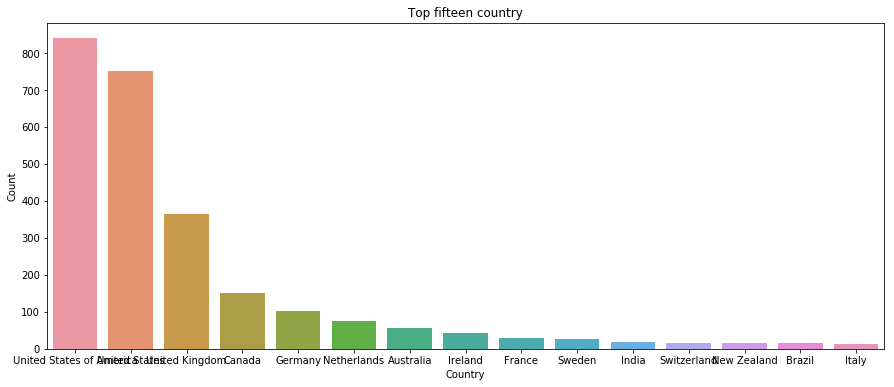

In [7]:
country_count = Counter(df['Country'].tolist()).most_common(15)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
plt.subplots(figsize=(15,6))
sns.barplot(x = country_idx,y=country_val )
plt.title('Top fifteen country')
plt.xlabel('Country')
plt.ylabel('Count')

Text(0,0.5,'Count')

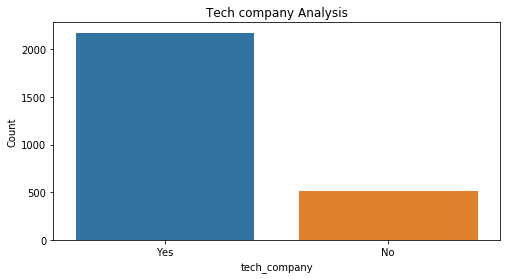

In [8]:
plt.subplots(figsize=(8,4))
sns.countplot(df['tech_company'].dropna())
plt.title('Tech company Analysis')
plt.ylabel('Count')

/home/rishabh/.local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Frequency')

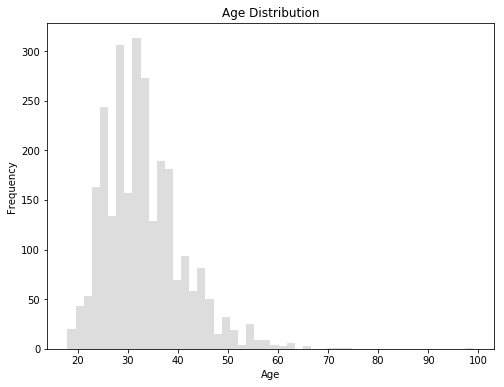

In [9]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#aaaaaa')
plt.title('Age Distribution')
plt.ylabel('Frequency')

In [10]:
#Encoding the data

#initailizing label Dictionary
labelDict = {}
for feature in df:
    le = preprocessing.LabelEncoder()
    le.fit(df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    df[feature] = le.transform(df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [le_name_mapping]
    labelDict[labelKey] =labelValue
    

In [11]:
#Dropping Country column as it's not required
df = df.drop(['Country'], axis= 1)

#having a look at the data
df.head()


,Age,Gender,anonymity,benefits,care_options,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,...,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,supervisor,tech_company,treatment,wellness_program,work_interfere
0,22,0,2,2,0,0,2,3,1,1,...,1,1,0,2,0,0,1,1,2,4
1,19,0,2,2,2,2,2,3,2,1,...,0,2,2,2,2,1,0,3,2,3
2,4,0,0,1,0,1,0,1,2,0,...,0,0,1,1,0,1,1,0,1,1
3,31,1,2,2,0,0,2,6,0,0,...,1,0,3,2,0,3,1,1,2,4
4,10,1,2,1,0,0,2,6,1,1,...,1,1,3,2,0,3,1,1,1,2


In [12]:
#scaling the Age values
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df.head()

,Age,Gender,anonymity,benefits,care_options,coworkers,family_history,leave,mental_health_consequence,mental_health_interview,...,phys_health_consequence,phys_health_interview,remote_work,seek_help,self_employed,supervisor,tech_company,treatment,wellness_program,work_interfere
0,0.431373,0,2,2,0,0,2,3,1,1,...,1,1,0,2,0,0,1,1,2,4
1,0.372549,0,2,2,2,2,2,3,2,1,...,0,2,2,2,2,1,0,3,2,3
2,0.078431,0,0,1,0,1,0,1,2,0,...,0,0,1,1,0,1,1,0,1,1
3,0.607843,1,2,2,0,0,2,6,0,0,...,1,0,3,2,0,3,1,1,2,4
4,0.196078,1,2,1,0,0,2,6,1,1,...,1,1,3,2,0,3,1,1,1,2


In [13]:

def treeClassifier():
    # Calculating the best parameters
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    
    # train a decision tree model on the training set
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    
    with open('decision_tree_model','wb') as f:
        pc.dump(tree,f)
    
    
    # make class predictions for the testing set
    y_pred_class = tree.predict(X_test)
    
    return y_pred_class
    #print('########### Tree classifier ###############')
    
   # accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)

    #Data for final graph
    #methodDict['Tree clas.'] = accuracy_score * 100





In [14]:
# define X and y
train_df=df[0:2390]
test_df=df[2390:]
test_df.head()
test_df.to_csv('test.csv')
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X =train_df[feature_cols]
y =train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 2392 to 2691
Data columns (total 23 columns):
Age                          300 non-null float64
Gender                       300 non-null int64
anonymity                    300 non-null int64
benefits                     300 non-null int64
care_options                 300 non-null int64
coworkers                    300 non-null int64
family_history               300 non-null int64
leave                        300 non-null int64
mental_health_consequence    300 non-null int64
mental_health_interview      300 non-null int64
mental_vs_physical           300 non-null int64
no_employees                 300 non-null int64
obs_consequence              300 non-null int64
phys_health_consequence      300 non-null int64
phys_health_interview        300 non-null int64
remote_work                  300 non-null int64
seek_help                    300 non-null int64
self_employed                300 non-null int64
supervisor               

In [16]:
y_pred= treeClassifier()
accuracy = metrics.accuracy_score(y_test, y_pred)

print(accuracy)

0.6715481171548117


In [17]:
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    with open('logisticRegression_model','wb') as f:
        pc.dump(logreg,f)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    return y_pred_class

In [18]:
y_pred=logisticRegression()
accuracy = metrics.accuracy_score(y_test, y_pred)

In [19]:
print(accuracy)

0.5774058577405857


In [20]:
def Knn():
    # Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
    # define the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
    # specify "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    
    # train a KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    with open('KNN_model','wb') as f:
        pc.dump(knn,f)
    
    # make class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    return y_pred_class



In [21]:
y_pred=Knn()
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.6631799163179917


In [22]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  


    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    with open('radomForest_model','wb') as f:
        pc.dump(my_forest,f)
    
    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    return y_pred_class


In [23]:
y_pred=randomForest()
accuracy = metrics.accuracy_score(y_test, y_pred)
print accuracy

0.7217573221757322


0.606694560669456
